In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Read the given CSV file, and view some sample records
RiyalState = pd.read_excel( "Real estate.xlsx" )
RiyalState_df = pd.DataFrame(RiyalState)

RiyalState_df['X5 Vector Mag'] = ((RiyalState_df['X5 latitude'])**2 + (RiyalState_df['X6 longitude'])**2)**(1/2)
RiyalState_df.drop(['X5 latitude', 'X6 longitude', 'No'], axis=1, inplace=True)

def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

RiyalState_df = swap_columns(RiyalState_df, 'X5 Vector Mag', 'Y house price of unit area')

RiyalState_df.to_excel(excel_writer = "./Riyalstate.xlsx")

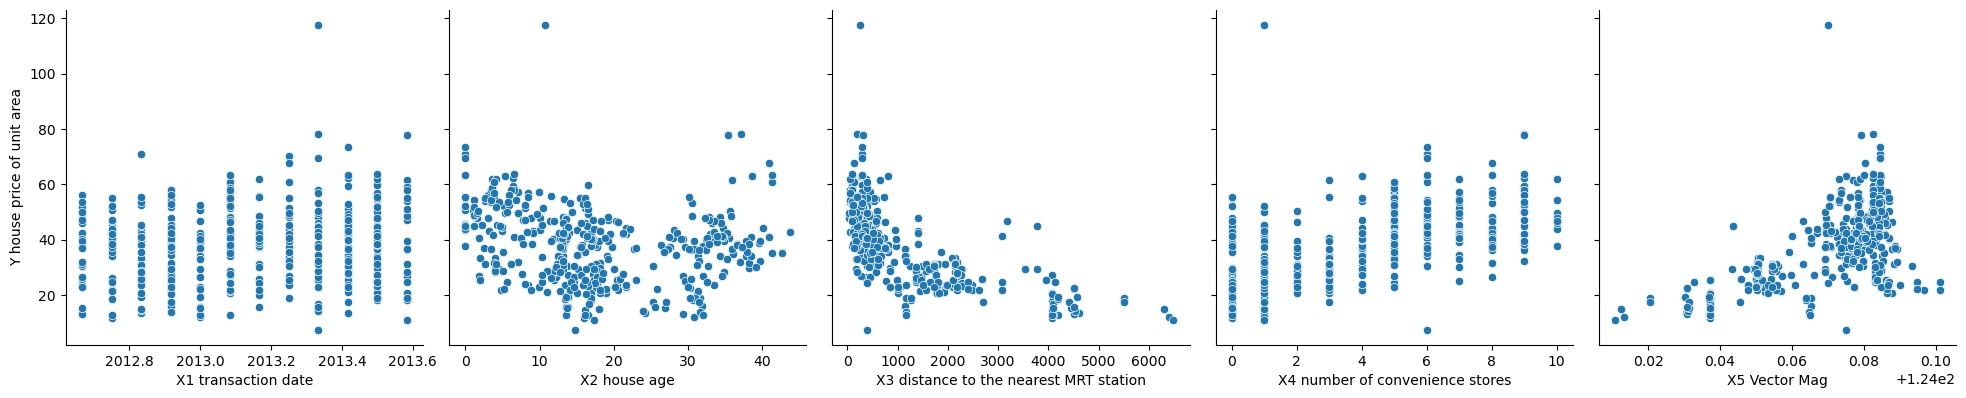

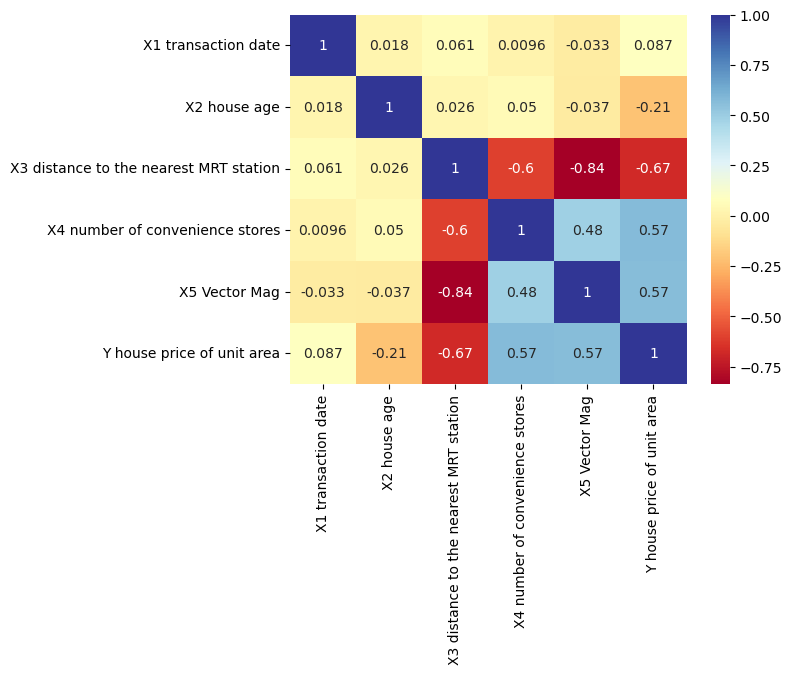

Coefficient of determination:  0.5285625014216284
R^2:  0.5285625014216284
MAE:  6.615303658467089
MSE:  88.67291598600512
RMSE:  9.416629757296668


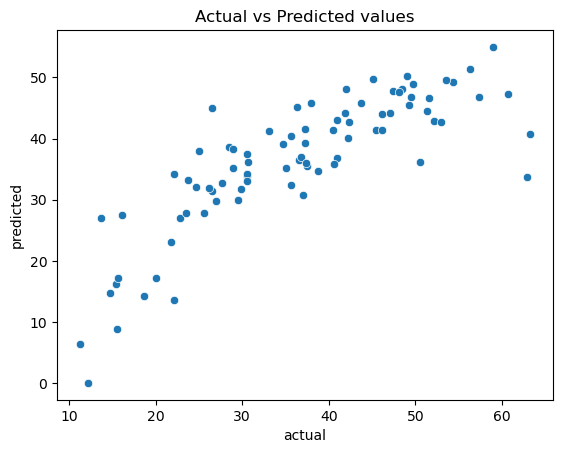

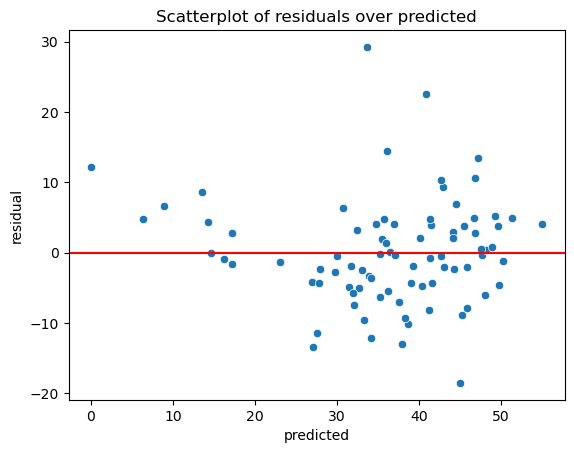

In [3]:
#to plot all the scatterplots in a single plot
sns.pairplot(RiyalState_df, x_vars=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 Vector Mag'], y_vars='Y house price of unit area', height=4, kind='scatter')
plt.show()

#To plot heatmap to find out correlations
sns.heatmap(RiyalState_df.corr(), cmap='RdYlBu', annot=True)
plt.show()

#AS TV is impacting the sales heavily so for analysisng TV
X = RiyalState_df.drop('Y house price of unit area', axis=1)
y = RiyalState_df['Y house price of unit area']
X.head()

#For traing and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8, test_size = 0.2, random_state = 42 )

#To check how data is assigned
#print( X_train.shape )
#print( X_test.shape )
#print( y_train.shape )
#print( y_test.shape )

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#print(X_scaled)

# create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#for linearreggession add extra column
# Initiate the model and fit into the training data
LR = LinearRegression()
LR.fit(X_train, y_train)

# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

y_pred = LR.predict(X_train)

print('R^2: ', r2_score(y_train, y_pred))
print('MAE: ',mean_absolute_error(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

y_pred_test = LR.predict(X_test)

# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_test.ravel(),
                        'residual': y_test - y_pred_test}
                      )
results.head()

# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'],
y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

R^2 (Training):  0.9523307043162775
MAE (Training):  1.918648043446985
MSE (Training):  8.966141777056938
RMSE (Training):  2.9943516455247767
R^2 (Test):  0.8267887994816665
MAE (Test):  3.899144979919682
MSE (Test):  29.05786674700136
RMSE (Test):  5.390534922157666


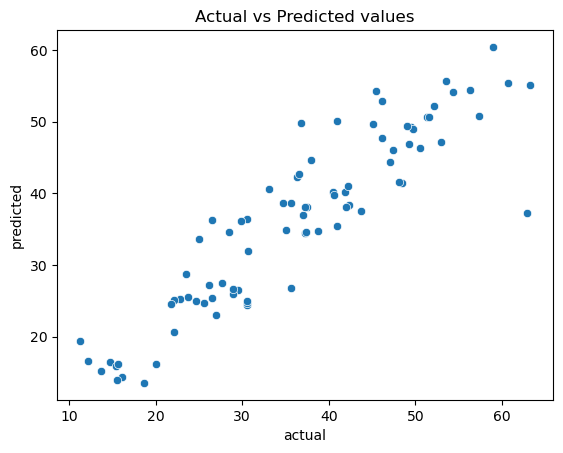

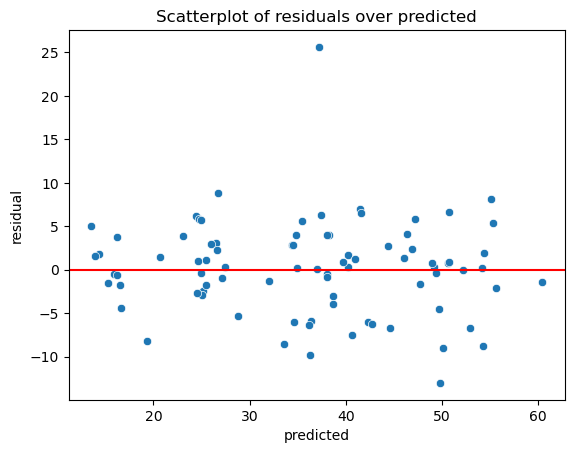

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Consider using RandomForestRegressor or other models for comparison
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model performance on the training data
y_pred_train = model.predict(X_train)
print('R^2 (Training): ', r2_score(y_train, y_pred_train))
print('MAE (Training): ', mean_absolute_error(y_train, y_pred_train))
print('MSE (Training): ', mean_squared_error(y_train, y_pred_train))
print('RMSE (Training): ', np.sqrt(mean_squared_error(y_train, y_pred_train)))

# Evaluate the model performance on the test data
y_pred_test = model.predict(X_test)
print('R^2 (Test): ', r2_score(y_test, y_pred_test))
print('MAE (Test): ', mean_absolute_error(y_test, y_pred_test))
print('MSE (Test): ', mean_squared_error(y_test, y_pred_test))
print('RMSE (Test): ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Visualize results
results = pd.DataFrame({'actual': y_test, 'predicted': y_pred_test, 'residual': y_test - y_pred_test})
# Visualization similar to what you've done

# Further analyze errors, feature importance, and model performance to identify areas for improvement
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'],
y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()


Coefficient of determination:  0.9517360468279439
R^2:  0.9517360468279439
MAE:  1.9077253632570852
MSE:  9.077991202829107
RMSE:  3.0129704948487475


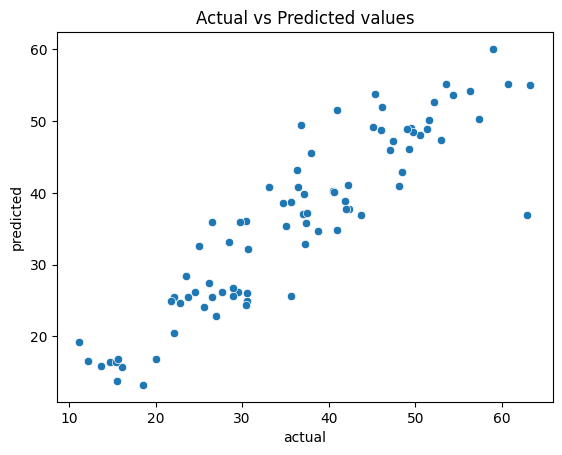

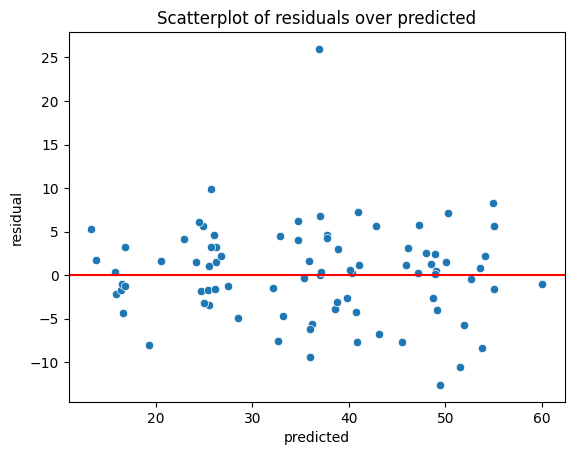

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_train and X_test have been defined previously

# Create a pipeline with PCA and a regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Set the desired variance to retain
    ('regressor', RandomForestRegressor())  # You can use any regressor here
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

LR = RandomForestRegressor()
LR.fit(X_train, y_train)

# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

y_pred = LR.predict(X_train)

print('R^2: ', r2_score(y_train, y_pred))
print('MAE: ',mean_absolute_error(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

y_pred_test = LR.predict(X_test)

# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_test.ravel(),
                        'residual': y_test - y_pred_test}
                      )
results.head()

# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'],
y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

Coefficient of determination:  0.5285625014216284
R^2:  0.5285625014216284
MAE:  6.615303658467089
MSE:  88.67291598600512
RMSE:  9.416629757296668


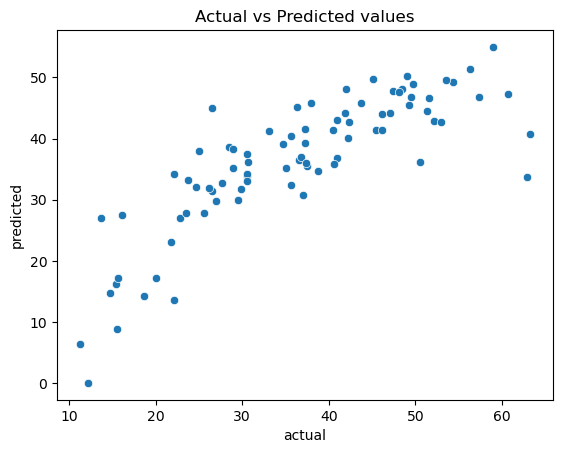

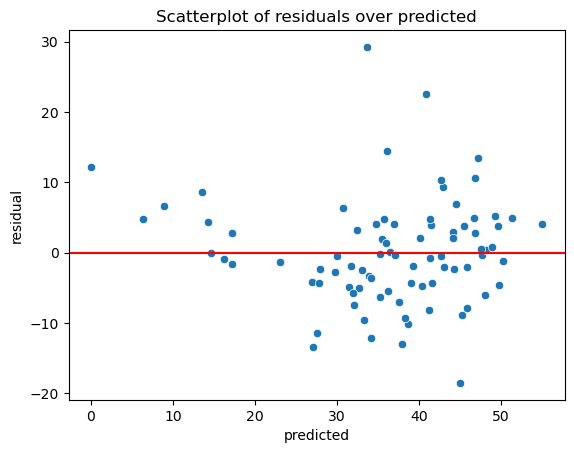

In [5]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_train and X_test have been defined previously

# Create a pipeline with PCA and a regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Set the desired variance to retain
    ('regressor', RandomForestRegressor())  # You can use any regressor here
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

LR = LinearRegression()
LR.fit(X_train, y_train)

# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

y_pred = LR.predict(X_train)

print('R^2: ', r2_score(y_train, y_pred))
print('MAE: ',mean_absolute_error(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

y_pred_test = LR.predict(X_test)

# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_test.ravel(),
                        'residual': y_test - y_pred_test}
                      )
results.head()

# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'],
y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

Training Set Metrics:
R^2:  0.5285625014216284
MAE:  6.615303658467089
MSE:  88.67291598600512
RMSE:  9.416629757296668

Test Set Metrics:
R^2:  0.665623327195262
MAE:  5.519396667255843
MSE:  56.09494520325398
RMSE:  7.4896558801625845
Coefficient of determination:  0.5285625014216284
R^2:  0.5285625014216284
MAE:  6.615303658467089
MSE:  88.67291598600512
RMSE:  9.416629757296668


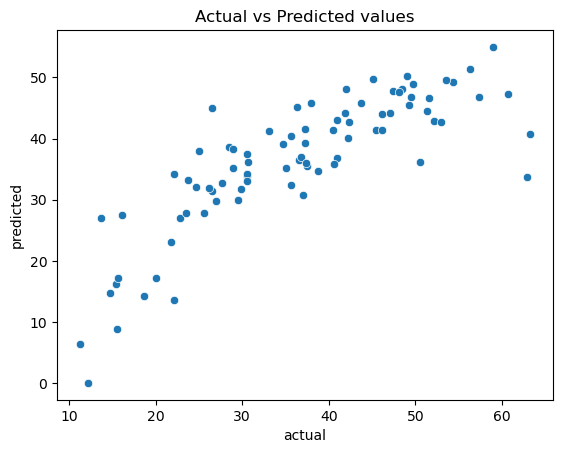

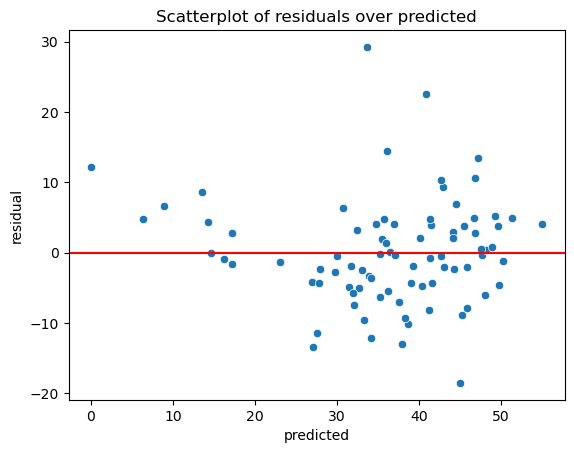

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_train and X_test have been defined previously

# Set the degree of the polynomial features
degree = 1  # You can change the degree as needed

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Initialize and fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Predict on the training set
y_pred_train = poly_reg.predict(X_poly_train)
print('Training Set Metrics:')
print('R^2: ', r2_score(y_train, y_pred_train))
print('MAE: ', mean_absolute_error(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))

# Predict on the test set
y_pred_test = poly_reg.predict(X_poly_test)
print('\nTest Set Metrics:')
print('R^2: ', r2_score(y_test, y_pred_test))
print('MAE: ', mean_absolute_error(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Visualize results, residuals, etc.
# You can use similar visualization techniques as used previously
print('Coefficient of determination: ', poly_reg.score(X_poly_train, y_train))

y_pred = poly_reg.predict(X_poly_train)

print('R^2: ', r2_score(y_train, y_pred))
print('MAE: ',mean_absolute_error(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

y_pred_test = poly_reg.predict(X_poly_test)

# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_test.ravel(),
                        'residual': y_test - y_pred_test}
                      )
results.head()

# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'],
y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()